***Project: In this project we will build a model that will predict Happiness.Score for the countries based on Economy.GDP.per.Capita parameter***

***Import required Libraries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

***Load Dataset***

In [ ]:
df=pd.read_csv('2017.csv')

In [ ]:
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


***Histogram***

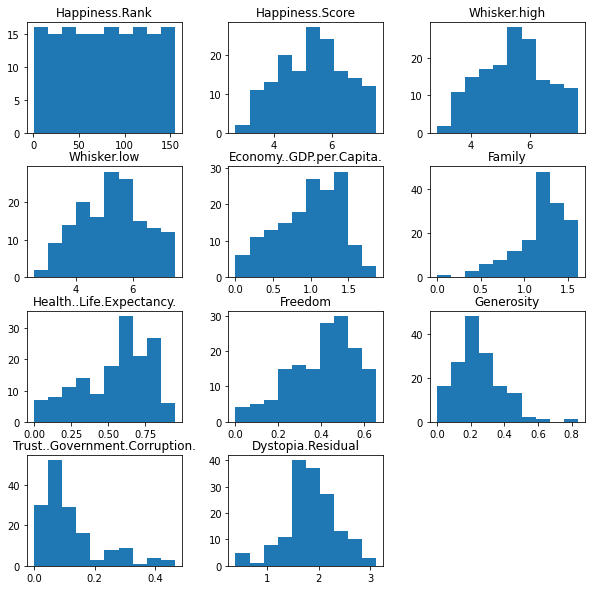

In [ ]:
histograms = df.hist(grid=False, figsize=(10, 10))

In [ ]:
df.shape

(155, 12)

In [ ]:
df.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [58]:
x=df['Economy..GDP.per.Capita.'].values
y=df['Happiness.Score'].values

In [63]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [64]:
x.shape,y.shape

((155, 1), (155, 1))

***Splitting train and test data***

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(124, 1) (124, 1) (31, 1) (31, 1)


***Model***

In [66]:
model=linear_model.LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

LinearRegression()

***Prediction***

In [67]:
y_pred=model.predict(x_test)

***Mean Squared Error***

In [68]:
error=mean_squared_error(y_pred,y_test)
print(error)

0.36538207615081647


***Plot the data***

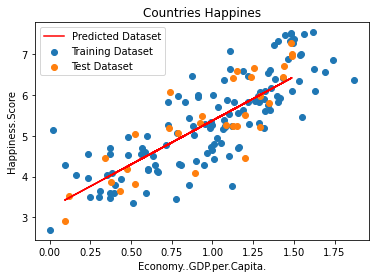

In [75]:
plt.scatter(x_train, y_train, label='Training Dataset')
plt.scatter(x_test, y_test, label='Test Dataset')
plt.plot(x_test,y_pred,label='Predicted Dataset',c='red')
plt.xlabel('Economy..GDP.per.Capita.')
plt.ylabel('Happiness.Score')
plt.title('Countries Happines')
plt.legend()
plt.show()

***Prediction Table***

In [81]:
test_predictions_table = pd.DataFrame({
    'Economy GDP per Capita': x_test.flatten(),
    'Test Happiness Score': y_test.flatten(),
    'Predicted Happiness Score': y_pred.flatten(),
    'Prediction Diff': (y_test-y_pred).flatten()
})

In [82]:
test_predictions_table.head()

,Economy GDP per Capita,Test Happiness Score,Predicted Happiness Score,Prediction Diff
0,1.128431,5.250,5.648082,-0.398082
1,0.431085,3.657,4.151473,-0.494473
2,1.127869,6.424,5.646875,0.777125
3,1.233748,6.452,5.874108,0.577892
4,0.339234,4.460,3.954346,0.505654
